# Bar Charts 

A Bar chart is a graph that uses bars to display information, allowing easy comparison between different categories. Depending on how you display the information, the bars can be vertical or horizontal.

Bar charts can be used in many situations, such as comparing monthly sales of different products or categories, determining how many books you read each month, how many cats and dogs your neighborhood has, and what kind of ice cream flavors sell more in a store. Bar charts make it easier to understand numbers by showing them as bars; the longer the bar, the bigger the number.

## Create a Bar Chart

To create a Bar chart in matplotlib, use the [plt.bar(x, height)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) function. The `x` represents the x coordinates of the bars, and the height represents the height of each bar.

Let's read a dataset. We will work with the insurance charges data. 

In [1]:
# filter warnings
import warnings

warnings.filterwarnings("ignore")

# import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# read data
df = pd.read_csv("../data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Vertical Bar Chart

The most common type of Bar chart is the Vertical Bar Chart. In this type of chart, categories are displayed along the horizontal axis, and the lengths of the bars are displayed along the vertical axis. 

Let's try to understand the average insurance charges for Smokers vs. non-smokers. To visualize this, we must first calculate each group's average insurance charges. 

In [3]:
# average insurance charges for smokers vs. non-smokers
average_charges = (df.groupby('smoker')['charges']
                   .mean()
                   .round(2)
                   .reset_index())
average_charges

,smoker,charges
0,no,8434.27
1,yes,32050.23


Now, let's use Matplotlib to create a Bar Chart.

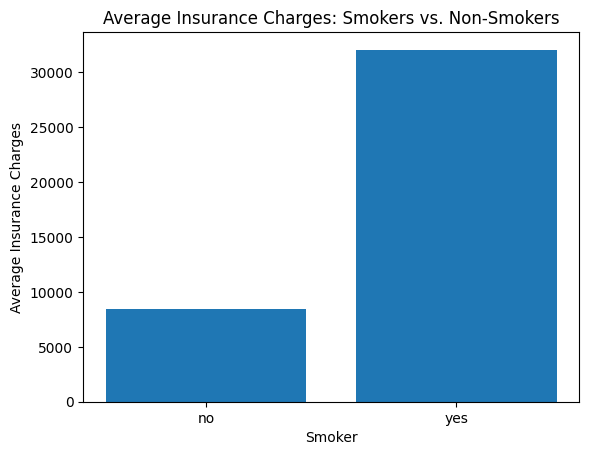

In [10]:
plt.bar(average_charges["smoker"], average_charges["charges"])
plt.title("Average Insurance Charges: Smokers vs. Non-Smokers")
plt.xlabel("Smoker")
plt.ylabel("Average Insurance Charges")
plt.savefig("../images/bar02.png")
plt.show()

As we can see, smokers tend to have significantly higher average insurance charges than non-smokers, highlighting the impact of smoking on insurance costs. 

We can further improve this chart by changing the colors of each bar. We will color the bar for smokers red and the bar for non-smokers green.

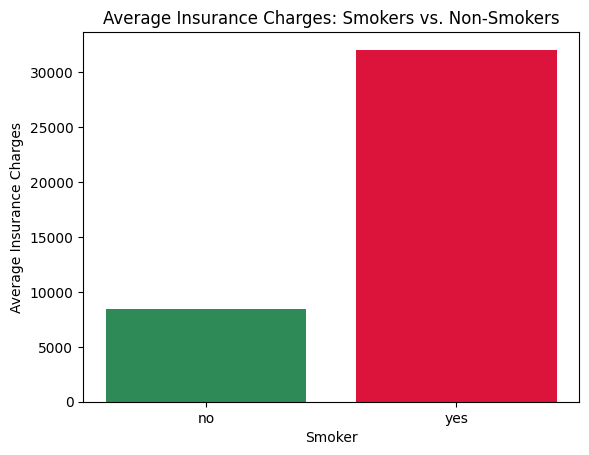

In [11]:
# Create a vertical bar chart
plt.bar(
    average_charges["smoker"], average_charges["charges"], color=["seagreen", "crimson"]
)
plt.title("Average Insurance Charges: Smokers vs. Non-Smokers")
plt.xlabel("Smoker")
plt.ylabel("Average Insurance Charges")
plt.savefig("../images/bar03.png")
plt.show()

Here, I am using different shades of red and green. Since the first bar represents non-smokers and the second bar represents smokers, I passed the list of colors in that order. 

Let's also add a grid to this plot.

## Add Grid Lines

To add grid lines in matplotlib, use the [plt.grid()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html) function. In the following code, I have added a grid with `alpha` to add transparency to the grid lines becuase I don't want the grids to dominate the chart. The `axis` lets you specify whether you want the grid on the x-axis, y-axis, or both. 

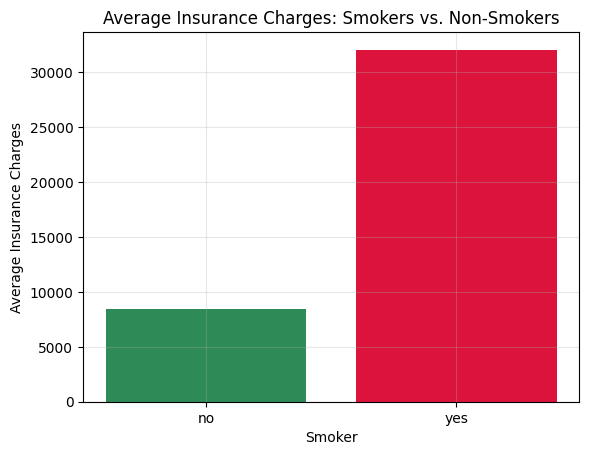

In [12]:
# vertical bar chart with grid
plt.bar(
    average_charges["smoker"], average_charges["charges"], color=["seagreen", "crimson"]
)
plt.title("Average Insurance Charges: Smokers vs. Non-Smokers")
plt.xlabel("Smoker")
plt.ylabel("Average Insurance Charges")
plt.grid(alpha=0.3)
plt.savefig("../images/bar04.png")
plt.show()

## Width of the Bars

To change the width of the bars, use the `width`. By default, it is `0.8`. 

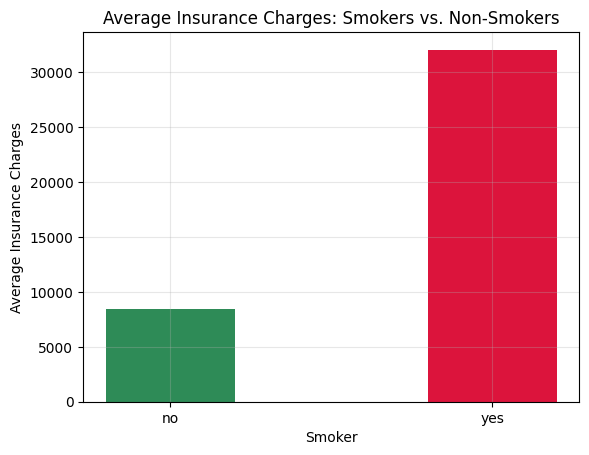

In [13]:
# bar chart with custom bar width
plt.bar(
    average_charges["smoker"],
    average_charges["charges"],
    color=["seagreen", "crimson"],
    width=0.4,
)
plt.title("Average Insurance Charges: Smokers vs. Non-Smokers")
plt.xlabel("Smoker")
plt.ylabel("Average Insurance Charges")
plt.grid(alpha=0.3)
plt.savefig("../images/bar05.png")
plt.show()

# Horizontal Bar Chart

A Horizontal bar chart compares the size of categories using horizontal bars. In this chart, categories are displayed on the vertical axis and their values on the horizontal axis. This type of chart is handy for displaying data with long category labels or when there are a large number of categories. 

To create a Horizontal bar chart in matplotlib, use the [plt.barh()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html) function. For example, let's look at the average insurance charges by region.

In [15]:
# Calculate the average insurance charges by region
avg_region = (
    df.groupby("region")["charges"]
    .mean()
    .round(2)
    .reset_index()
    .sort_values(by="charges")
)
avg_region.head()

,region,charges
3,southwest,12346.94
1,northwest,12417.58
0,northeast,13406.38
2,southeast,14735.41


Looking carefully, you can see that I have also sorted the data by charges in ascending order, creating a natural progression of the bars when plotted. The bar with the highest charges will appear at the top, and the bar with the lowest will be at the bottom. This makes comparing bars much easier. You can also reverse the order of the bars by changing the sorting order.

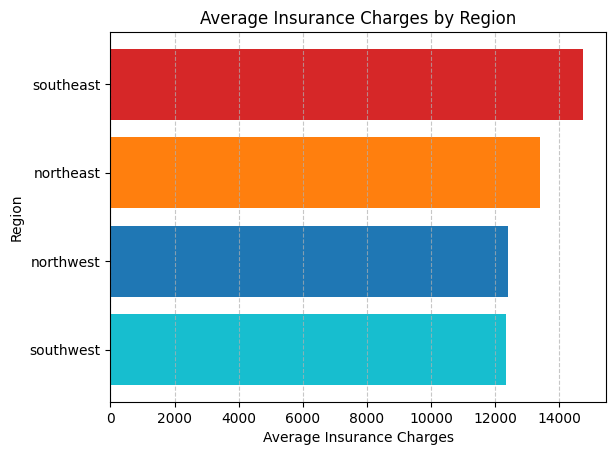

In [16]:
# horizontal bar chart for average insurance charges by region
plt.barh(
    avg_region["region"],
    avg_region["charges"],
    color=["tab:cyan", "tab:blue", "tab:orange", "tab:red"],
)
plt.title("Average Insurance Charges by Region")
plt.xlabel("Average Insurance Charges")
plt.ylabel("Region")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.savefig("../images/bar06.png")
plt.show()

>**Tip:** In `plt.barh(y, width)`, the second argument is the `width` of the bar, which corresponds to the value they represent in a horizontal bar chart, not their height, as might be intuitively thought. This contrasts with `plt.bar(x, height)`  function for vertical bar charts, where the second argument represents the heights of the bars. For horizontal bars, the `height` controls the thickness of the bars, which can be set manually to adjust how thick or thin the bars appear. This distinction is crucial when plotting data in horizontal versus vertical bar charts.


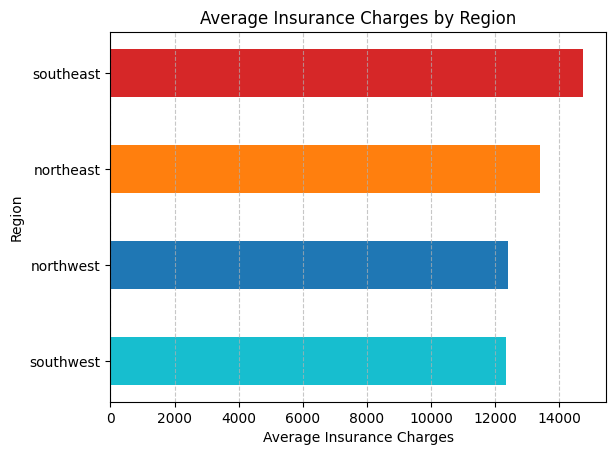

In [17]:
# horizontal bar chart with custom bar height
plt.barh(
    avg_region["region"],
    avg_region["charges"],
    color=["tab:cyan", "tab:blue", "tab:orange", "tab:red"],
    height=0.5,
)  # set the height
plt.title("Average Insurance Charges by Region")
plt.xlabel("Average Insurance Charges")
plt.ylabel("Region")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.savefig("../images/bar07.png")
plt.show()

We can see the average insurance charges are highest in the `southeast` region and lowest in the `southwest` region.


The average insurance charges are highest in the southeast region and lowest in the southwest region.

## Exercise 4.1

1. Calculate the average insurance charges based on `sex`.
2. Create a vertical bar chart for average insurance charges by `sex`.
3. Change the colors of the bars other than the default. You can find more info here - [matplotlib colors](https://matplotlib.org/stable/gallery/color/named_colors.html) or [HTML color names](https://htmlcolorcodes.com/color-names/)
4. Add Grid lines to the plot and experiment with different grid options available in matplotlib. [Grid document](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html)
5. Change the width of the bars.

## Exercise 4.2

1. Read the `penguins.csv` data in pandas.
2. calculate the average body mass of penguins by species.
3. Create a Horizontal bar chart by species.
4. Change the height and colors of the bars.


# Stacked Bar Chart 

In data visualization, a Stacked Bar chart segments the categories into sub-categories, where the total length of each bar represents the combined total of its sub-categories. 

Let's segment each region by smokers and non-smokers. First, we will group the data by `region` and `smoker` and then calculate the average insurance charges for each sub-category.

In [18]:
# Group by region and smoker and calculate average charges
region_smoker = df.groupby(["region", "smoker"])["charges"].mean().round(2).unstack()
region_smoker

smoker,no,yes
region,,
northeast,9165.53,29673.54
northwest,8556.46,30192.00
southeast,8032.22,34845.00
southwest,8019.28,32269.06


Next, we will set up the plot. We will define the positions for each region on the x-axis and separate the data for non-smokers and smokers. Separating the data is optional but will make understanding what we are doing easy.

In [20]:
# Separate the data for non-smokers and smokers
non_smokers = region_smoker["no"]
smokers = region_smoker["yes"]

# positions for the regions on the x-axis
positions = range(len(region_smoker))

Next, we will plot the bars for non-smokers and then for smokers, stacked on top of non-smokers, using the `bottom` parameter. We will also use the [plt.xticks()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html) to set the tick locations and labels.

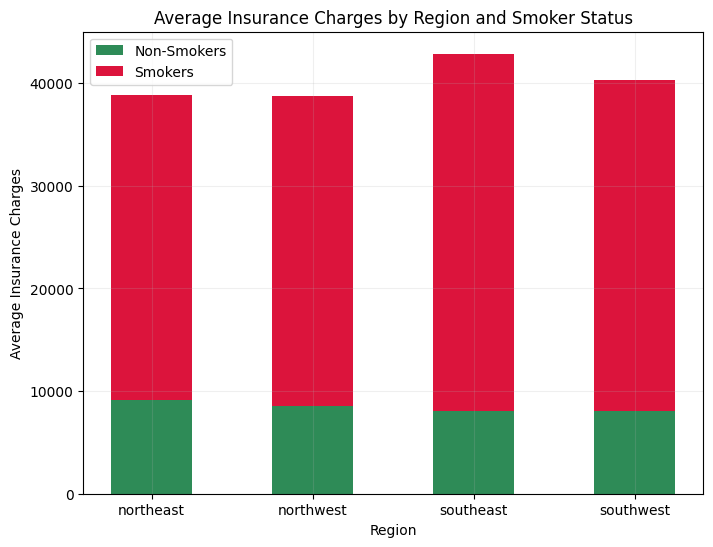

In [21]:
# Create a stacked bar chart
plt.figure(figsize=(8, 6))

# Plot bars for non-smokers
plt.bar(positions, non_smokers, width=0.5, label="Non-Smokers", color="seagreen")

# Plot bars for smokers, stacked on top of non-smokers by using the bottom parameter
plt.bar(
    positions, smokers, width=0.5, bottom=non_smokers, label="Smokers", color="crimson"
)

# Add some details
plt.title("Average Insurance Charges by Region and Smoker Status")
plt.xlabel("Region")
plt.ylabel("Average Insurance Charges")
plt.xticks(positions, region_smoker.index)
plt.grid(alpha=0.2)
plt.legend()
plt.savefig("../images/bar08.png")
plt.show()

We can see average insurance charges are very high for smokers in all regions compared to non-smokers. 

## Exercise 4.3

1. Group the penguin's data by `species` and `sex` and calculate the `average` body mass.
2. Separate the data for females and males.
3. Define the positions for each species on the x-axis.
4. Create a Stacked bar chart for each species segemented by sex.

# Grouped Bar Chart 

A Grouped Bar chart, also known as a clustered bar chart, is another type of bar chart used to compare different categories. Instead of stacking the bars as we did with the stacked bar chart, the grouped bar chart plots each sub-category side by side.

Let's turn our previously created stacked bar chart into a grouped bar chart. First, we need to determine the positions of the bars on the x-axis. To plot bars side by side, we will adjust these positions by shifting slightly left or right from the central positions for each group.

In [22]:
import numpy as np

# Define the width of the bars and the positions
bar_width = 0.35
n_regions = len(region_smoker.index)
index = np.arange(n_regions)

# Calculating positions for smokers and non-smokers
positions_non_smokers = index - bar_width / 2
positions_smokers = index + bar_width / 2

For the non-smokers, we subtract half the bar width from each index to place these bars slightly to the left, and for smokers, we add half the bar width to each index to place these bars to the right.

Now, we have to plot two bar charts, one for the non-smokers and one for the smokers.

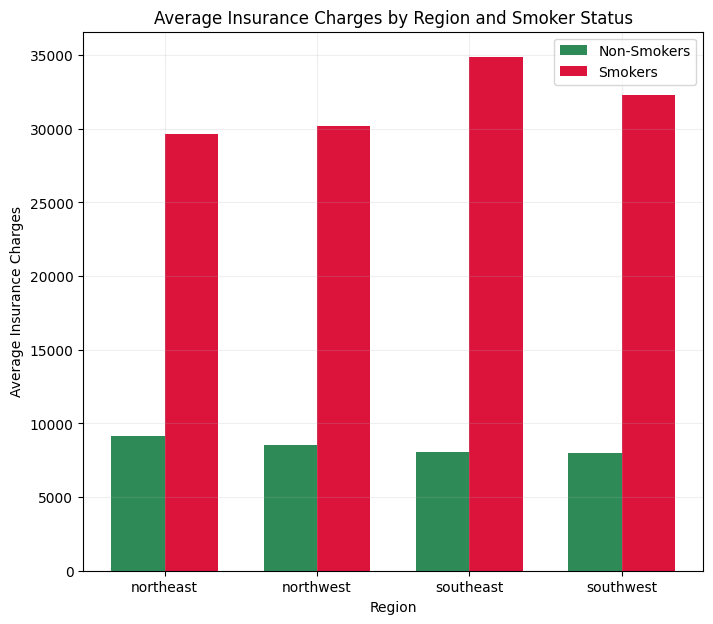

In [23]:
# Plotting the bars for non-smokers and smokers
plt.figure(figsize=(8, 7))

plt.bar(
    positions_non_smokers,
    non_smokers,
    width=bar_width,
    label="Non-Smokers",
    color="seagreen",
)

plt.bar(positions_smokers, smokers, width=bar_width, label="Smokers", color="crimson")

# Adding chart details
plt.xlabel("Region")
plt.ylabel("Average Insurance Charges")
plt.title("Average Insurance Charges by Region and Smoker Status")
plt.xticks(index, region_smoker.index)
plt.grid(alpha=0.2)
plt.legend()
plt.savefig("../images/bar09.png")
plt.show()

## Exercise 4.4

1. Convert the Stacked bar chart from Exercise 3.3 to a Grouped Bar chart.

# Summary

* To create a Vertical Bar chart in matplotlib, use the `plt.bar()` function.
* The width of the bars in the Vertical Bar chart is adjusted with the `width`.
* To create a Horizontal Bar chart, use the `plt.barh()` function.
* The `height` parameter adjusts the width of the bars in the Horizontal Bar chart.
* In a Stacked Bar chart, sub-categories are stacked on each other for every category.
* In a Grouped Bar chart, sub-categories are placed side by side for each category.

# Solutions

## Exercise 4.1

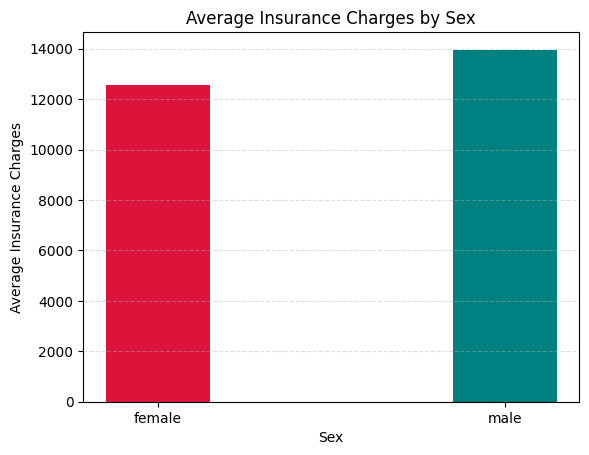

In [2]:
# ignore warnings
import warnings

warnings.filterwarnings("ignore")

# import libraries
import pandas as pd
import matplotlib.pyplot as plt

# read insurance data
df = pd.read_csv("../data/insurance.csv")

# calculate average insurance charges by sex
avg_charges_sex = df.groupby("sex")["charges"].mean().reset_index()

# create a vertical bar chart
plt.bar(
    avg_charges_sex["sex"],
    avg_charges_sex["charges"],
    color=["crimson", "teal"],
    width=0.3,
)

plt.title("Average Insurance Charges by Sex")
plt.xlabel("Sex")
plt.ylabel("Average Insurance Charges")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.savefig("../images/bar10.png")
plt.show()

## Exercise 4.2


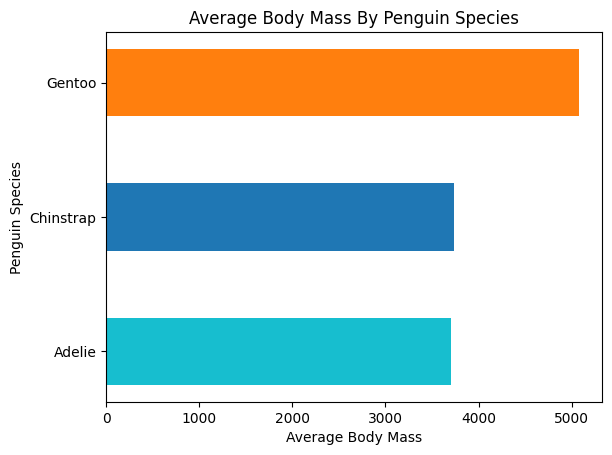

In [3]:
# read penguins data
penguins = pd.read_csv("../data/penguins.csv")

# calculate the average body mass of the penguin species
avg_species = (
    penguins.groupby("species")["body_mass_g"]
    .mean()
    .reset_index()
    .sort_values(by="body_mass_g")
)

# create a horizontal bar chart
plt.barh(
    avg_species["species"],
    avg_species["body_mass_g"],
    color=["tab:cyan", "tab:blue", "tab:orange"],
    height=0.5,
)

plt.title("Average Body Mass By Penguin Species")
plt.xlabel("Average Body Mass")
plt.ylabel("Penguin Species")
plt.savefig("../images/bar11.png")
plt.show()

## Exercise 4.3 

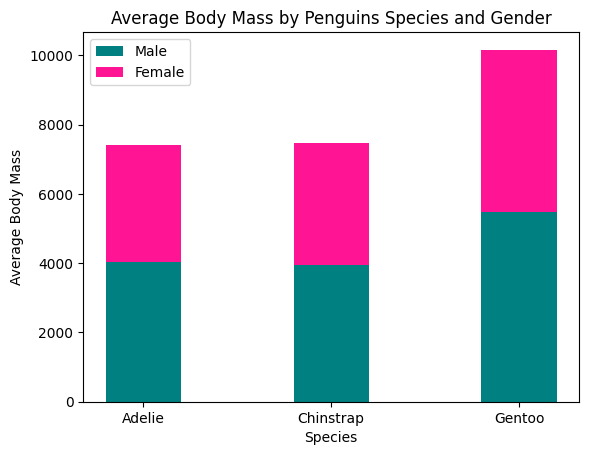

In [5]:
# Group by species and sex and calculate the average body mass.
species_sex = penguins.groupby(["species", "sex"])["body_mass_g"].mean().unstack()

# Seperate the data for male and female
penguins_male = species_sex["MALE"]
penguins_female = species_sex["FEMALE"]

# define the positions of the groups on the x-axis
positions = range(len(penguins_female))

# create a Stacked Bar chart for each species.
plt.bar(positions, penguins_male, width=0.4, label="Male", color="teal")

plt.bar(
    positions,
    penguins_female,
    width=0.4,
    bottom=penguins_male,
    label="Female",
    color="deeppink",
)

plt.title("Average Body Mass by Penguins Species and Gender")
plt.xlabel("Species")
plt.ylabel("Average Body Mass")
plt.xticks(positions, species_sex.index)
plt.legend()
plt.savefig("../images/bar12.png")
plt.show()

## Exercise 4.4


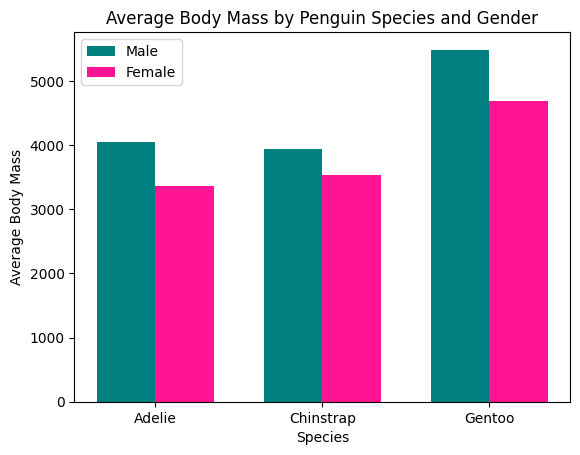

In [7]:
import numpy as np

# bar width and index positions
bar_width = 0.35
n_species = len(penguins_female.index)
index = np.arange(n_species)

# define the positions for males and females
positions_male = index - bar_width / 2
positions_female = index + bar_width / 2

# create a grouped bar chart
plt.bar(positions_male, penguins_male, width=bar_width, label="Male", color="teal")
plt.bar(
    positions_female, penguins_female, width=bar_width, label="Female", color="deeppink"
)
plt.title("Average Body Mass by Penguin Species and Gender")
plt.xlabel("Species")
plt.ylabel("Average Body Mass")
plt.xticks(index, penguins_female.index)
plt.legend()
plt.savefig("../images/bar13.png")
plt.show()